# Модель Хищник-Жертва

U_etalon = 25.273104134829083, V_etalon = 200.79719098469036


<Figure size 432x288 with 0 Axes>

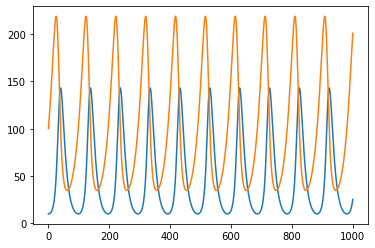

<Figure size 432x288 with 0 Axes>

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

low = 0; up = 1000;

def f(uv, t, a1 = 1e-1, a2 = .5e-1, gam1 = 1e-3, gam2 = 1e-3, b2 = 0):
    u = -a1 * uv[0] + gam1 * uv[0] * uv[1]
    v = a2 * uv[1] - gam2 * uv[0] * uv[1] - b2 * uv[1] **2
    return [u,v]

t = np.arange(low, up, .1)
u0 = [10, 100]
u_t = odeint(f, u0, t)

u_etalon, v_etalon = u_t[len(u_t) - 1]

print(f'U_etalon = {u_etalon}, V_etalon = {v_etalon}')

#U(t)
plt.plot(t, abs(u_t[:,0]))
#V(t)
plt.plot(t, abs(u_t[:,1]))

plt.figure()

# Фазовый портрет

<Figure size 432x288 with 0 Axes>

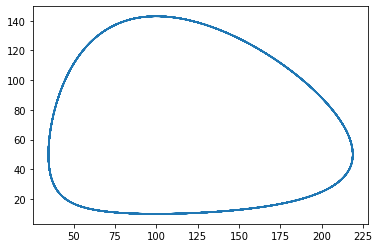

<Figure size 432x288 with 0 Axes>

In [24]:
#U(V)
plt.plot(abs(u_t[:,1]), abs(u_t[:,0]))

plt.figure()

In [52]:
error = []

def f_parametrized(uv, params, t):

    if   len(params) == 1:
        u,v = f(uv, t, a1 = params[0])
    elif len(params) == 2:
        u,v = f(uv, t, a1 = params[0], a2 = params[1])
    elif len(params) == 3:
        u,v = f(uv, t, a1 = params[0], a2 = params[1], gam1 = params[2])
    elif len(params) == 4:
        u,v = f(uv, t, a1 = params[0], a2 = params[1], gam1 = params[2], gam2 = params[3])
    
    return u,v

def error_function(params, t_grid = t):
    uv_etalon = u_t
    result = 0
    ideal_params = [1e-1, .5e-1]
    for i, t_i in enumerate(t_grid):
        u_ideal, v_ideal = f_parametrized(uv_etalon[i], ideal_params, t_i)
        u_pred, v_pred = f_parametrized(uv_etalon[i], params, t_i)
        result += ((u_ideal - u_pred) ** 2 + (v_ideal - v_pred) ** 2) / 2
    
    result /= t_grid.shape[0]
    error.append(result)
    return result

# Варьирование одного параметра a1

In [53]:
a1 = [1]
error = []

In [54]:
from scipy.optimize import minimize

res = minimize(fun = error_function, x0 = a1, method = "Nelder-Mead", options = {"maxiter":120,"disp":True,"xatol": 1e-6, "fatol": 1e-6 })
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 46
 final_simplex: (array([[0.1       ],
       [0.10000076]]), array([1.40745322e-27, 1.26485728e-09]))
           fun: 1.407453222168457e-27
       message: 'Optimization terminated successfully.'
          nfev: 46
           nit: 23
        status: 0
       success: True
             x: array([0.1])


<Figure size 432x288 with 0 Axes>

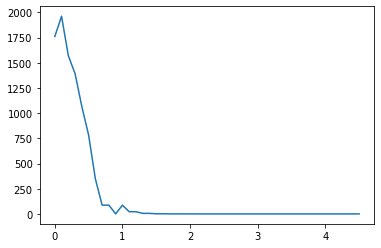

<Figure size 432x288 with 0 Axes>

In [55]:
plt.plot(t[:len(error)], error)

plt.figure()

# Варьирование двух параметров a1, a2

In [56]:
a2 = [1, 1]
error = []

In [57]:
res = minimize(fun = error_function, x0 = a2, method = "Nelder-Mead", options = {"maxiter":120,"disp":True,"xatol": 1e-6, "fatol": 1e-6 })
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 113
 final_simplex: (array([[0.09999969, 0.04999999],
       [0.10000029, 0.04999989],
       [0.09999975, 0.04999974]]), array([2.09173336e-10, 2.59889620e-10, 6.12636107e-10]))
           fun: 2.091733362384552e-10
       message: 'Optimization terminated successfully.'
          nfev: 113
           nit: 58
        status: 0
       success: True
             x: array([0.09999969, 0.04999999])


<Figure size 432x288 with 0 Axes>

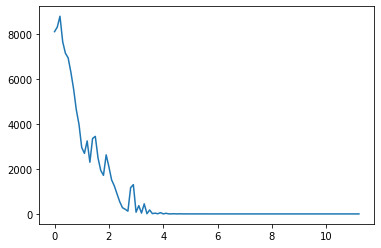

<Figure size 432x288 with 0 Axes>

In [58]:
plt.plot(t[:len(error)], error)

plt.figure()

# Варьирование трех параметров a1, a2, gamma1

In [59]:
a2 = [1, 1, 1]
error = []

In [60]:
res = minimize(fun = error_function, x0 = a2, method = "Nelder-Mead", options = {"maxiter":120,"disp":True,"xatol": 1e-6, "fatol": 1e-6 })
print(res)

 final_simplex: (array([[0.50520321, 0.03865198, 0.00468316],
       [0.52108065, 0.051836  , 0.00476957],
       [0.56890163, 0.0399847 , 0.00489023],
       [0.54738817, 0.04240535, 0.00512629]]), array([ 93.60583052,  98.25404883, 114.64605259, 115.67761838]))
           fun: 93.60583052223977
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 216
           nit: 120
        status: 2
       success: False
             x: array([0.50520321, 0.03865198, 0.00468316])


<Figure size 432x288 with 0 Axes>

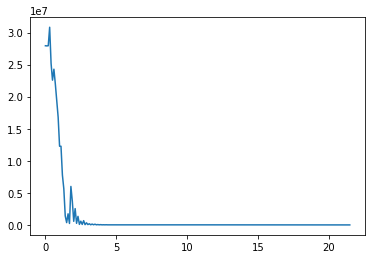

<Figure size 432x288 with 0 Axes>

In [61]:
plt.plot(t[:len(error)], error)

plt.figure()

# Варьирование трех параметров a1, a2, gamma1, gamma2

In [62]:
a2 = [1, 1, 1, 1]
error = []

In [63]:
res = minimize(fun = error_function, x0 = a2, method = "Nelder-Mead", options = {"maxiter":120,"disp":True,"xatol": 1e-6, "fatol": 1e-6 })
print(res)

 final_simplex: (array([[2.5263565 , 0.33117819, 0.01950465, 0.00454577],
       [2.53124501, 0.32439694, 0.01959308, 0.00427316],
       [2.50717052, 0.35942511, 0.01955628, 0.00465832],
       [2.5284455 , 0.32820201, 0.01987891, 0.00438767],
       [2.52394225, 0.33530031, 0.01941503, 0.00480989]]), array([3211.22386637, 3211.73704437, 3211.75131721, 3212.8593777 ,
       3215.55384972]))
           fun: 3211.2238663701737
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 209
           nit: 120
        status: 2
       success: False
             x: array([2.5263565 , 0.33117819, 0.01950465, 0.00454577])


<Figure size 432x288 with 0 Axes>

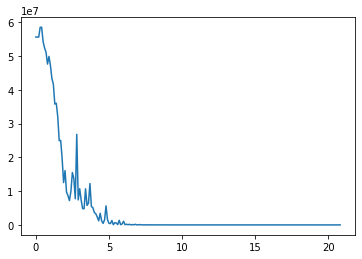

<Figure size 432x288 with 0 Axes>

In [64]:
plt.plot(t[:len(error)], error)

plt.figure()